In [2]:
!pip install pandas_datareader

In [1]:
from fbprophet import Prophet

In [2]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=cba3dba77f8e0bb9251f4a7330fa456d9ce219542cd236a76c7e6cc2bd4de197
  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import pandas_datareader.data as web

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [6]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22414 sha256=97a47c4f2eddd2b0f45d614c04c9bfbf6f0e964b77c3088382337524744a3dc0
  Stored in directory: C:\Users\ADMINI~1\AppData\Local\Temp\pip-ephem-wheel-cache-bq0fih1_\wheels\f9\e3\5b\ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Created wheel for multitasking: filename=multitasking-0.0.9-cp37-none-any.whl size=8373 sha256=31da4de7eec408e68b689d3d090201c8510f8bc6d95501392908dfbcb5492f19
  Stored in directory: C:\Users\ADMINI~1\AppData\Local\Temp\pip-ephem-wheel-cache-bq0fih1_\wheels\37\fa\73\d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking


In [9]:
traffic_web = pd.read_csv('archive7-8/08. Web Traffic.csv',
                         encoding='utf-8',
                         thousands=',',
                         names = ['date','hit'], index_col=0)

In [10]:
traffic_web = traffic_web[traffic_web['hit'].notnull()]

In [11]:
traffic_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


<AxesSubplot:xlabel='date'>

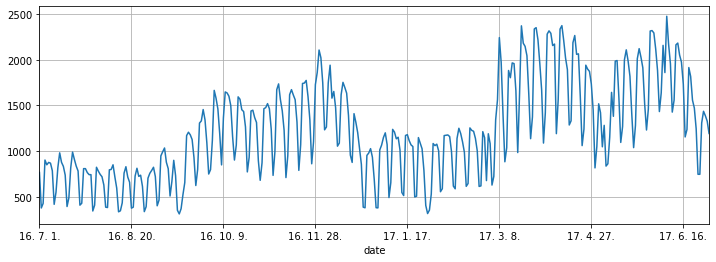

In [12]:
traffic_web['hit'].plot(figsize=(12,4), grid=True)

In [14]:
traffic_web['hit']

date
16. 7. 1.      766.0
16. 7. 2.      377.0
16. 7. 3.      427.0
16. 7. 4.      902.0
16. 7. 5.      850.0
               ...  
17. 6. 26.    1309.0
17. 6. 27.    1436.0
17. 6. 28.    1387.0
17. 6. 29.    1328.0
17. 6. 30.    1193.0
Name: hit, Length: 365, dtype: float64

In [17]:
df = pd.DataFrame({'ds':traffic_web.index, 'y':traffic_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

In [18]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [21]:
future = m.make_future_dataframe(periods=5)

In [22]:
future

,ds
0,2016-07-01
1,2016-07-02
2,2016-07-03
3,2016-07-04
4,2016-07-05
...,...
365,2017-07-01
366,2017-07-02
367,2017-07-03
368,2017-07-04


In [23]:
forcast = m.predict(future)

In [24]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-01,824.576922,510.040582,959.266394,824.576922,824.576922,-94.335613,-94.335613,-94.335613,236.084315,236.084315,236.084315,-51.467790,-51.467790,-51.467790,-278.952139,-278.952139,-278.952139,0.0,0.0,0.0,730.241309
1,2016-07-02,825.416679,98.234893,521.267613,825.416679,825.416679,-525.935009,-525.935009,-525.935009,236.084315,236.084315,236.084315,-467.268743,-467.268743,-467.268743,-294.750582,-294.750582,-294.750582,0.0,0.0,0.0,299.481669
2,2016-07-03,826.256435,214.140301,627.051676,826.256435,826.256435,-406.571231,-406.571231,-406.571231,236.084315,236.084315,236.084315,-335.184312,-335.184312,-335.184312,-307.471234,-307.471234,-307.471234,0.0,0.0,0.0,419.685205
3,2016-07-04,827.096192,756.945301,1172.522569,827.096192,827.096192,135.972339,135.972339,135.972339,236.084315,236.084315,236.084315,217.224608,217.224608,217.224608,-317.336584,-317.336584,-317.336584,0.0,0.0,0.0,963.068531
4,2016-07-05,827.935949,769.280811,1199.910616,827.935949,827.935949,164.825671,164.825671,164.825671,236.084315,236.084315,236.084315,253.352629,253.352629,253.352629,-324.611273,-324.611273,-324.611273,0.0,0.0,0.0,992.761620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2017-07-01,1134.777075,427.728996,845.531253,1134.777075,1134.777075,-505.684552,-505.684552,-505.684552,236.084315,236.084315,236.084315,-467.268743,-467.268743,-467.268743,-274.500124,-274.500124,-274.500124,0.0,0.0,0.0,629.092523
366,2017-07-02,1135.631020,537.416653,960.162753,1135.631020,1135.631020,-390.197174,-390.197174,-390.197174,236.084315,236.084315,236.084315,-335.184312,-335.184312,-335.184312,-291.097178,-291.097178,-291.097178,0.0,0.0,0.0,745.433846
367,2017-07-03,1136.484965,1073.590772,1492.284451,1136.484965,1136.484965,148.740701,148.740701,148.740701,236.084315,236.084315,236.084315,217.224608,217.224608,217.224608,-304.568222,-304.568222,-304.568222,0.0,0.0,0.0,1285.225666
368,2017-07-04,1137.338910,1103.409159,1523.496646,1137.338794,1137.338982,174.312834,174.312834,174.312834,236.084315,236.084315,236.084315,253.352629,253.352629,253.352629,-315.124110,-315.124110,-315.124110,0.0,0.0,0.0,1311.651744


In [26]:
forcast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-07-01,730.241309,510.040582,959.266394
1,2016-07-02,299.481669,98.234893,521.267613
2,2016-07-03,419.685205,214.140301,627.051676
3,2016-07-04,963.068531,756.945301,1172.522569
4,2016-07-05,992.761620,769.280811,1199.910616
...,...,...,...,...
365,2017-07-01,629.092523,427.728996,845.531253
366,2017-07-02,745.433846,537.416653,960.162753
367,2017-07-03,1285.225666,1073.590772,1492.284451
368,2017-07-04,1311.651744,1103.409159,1523.496646


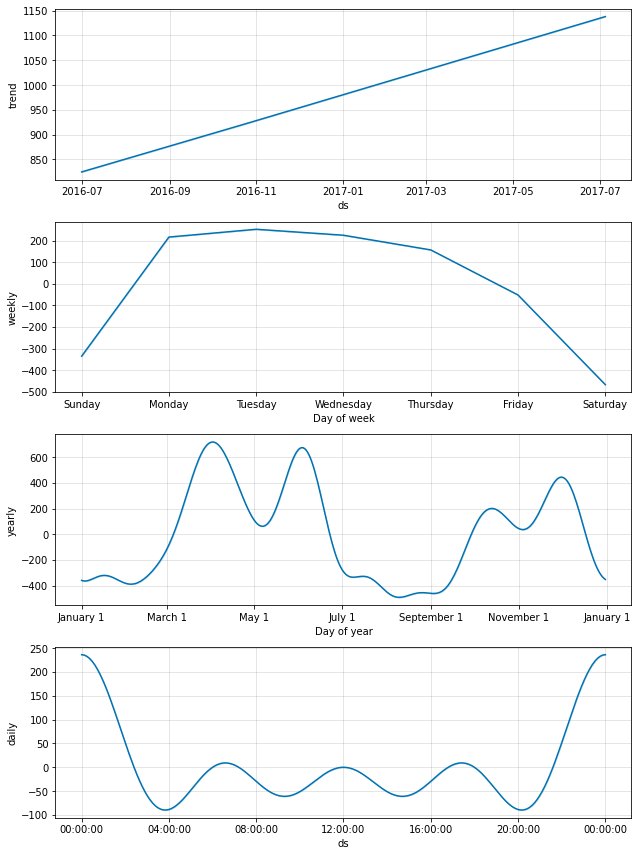

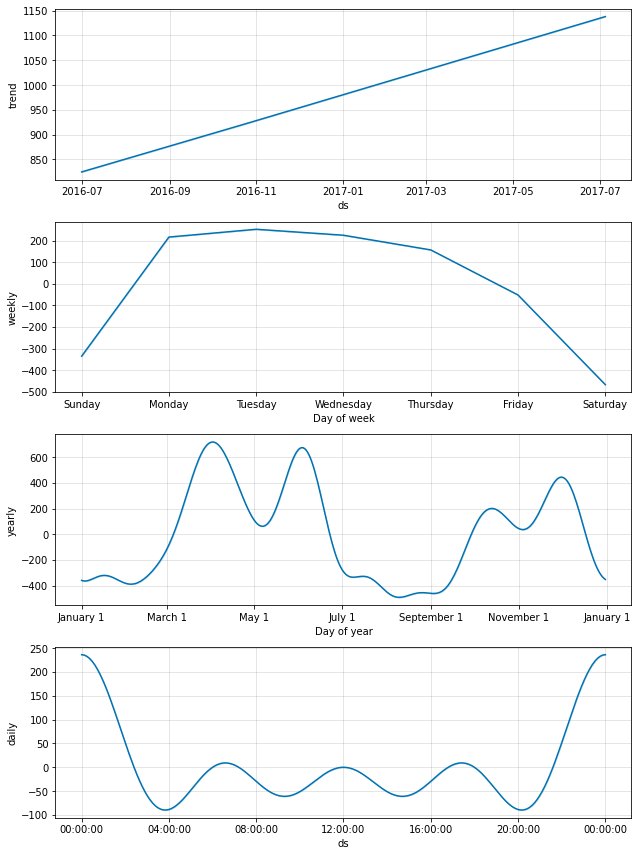

In [27]:
m.plot_components(forcast)